# East Bay Transit data project
#### A project exploring East Bay public transit using publicly available data from AC Transit, BART, and the census.

#### Goal
The goal of this notebook is to create the Bay Area census tracts shapefile

#### Context
Using IPUMS NHGIS we got some preliminary interesting statistics for census tracts. These, however, span the whole US. We also go a shapefile with the 2018 census tracts for the whole US. Since our analysis only covers the Bay Area we need to create a subset of these datasets.

In [1]:
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'14-May-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(EXTERNAL_DATA)

+ ../data/external
    + UniqueStops_Winter19.zip
    + Winter19Routeshape.zip
    + nhgis0008_csv.zip
    + nhgis0008_shape.zip


In [4]:
ZipFile(EXTERNAL_DATA / 'nhgis0008_csv.zip').extractall(INTERIM_DATA)

In [5]:
ZipFile(EXTERNAL_DATA / 'nhgis0008_shape.zip').extractall(INTERIM_DATA)

In [6]:
tree(INTERIM_DATA)

+ ../data/interim
    + nhgis0008_csv
            + nhgis0008_ds239_20185_2018_tract_codebook-checkpoint.txt
        + nhgis0008_ds239_20185_2018_tract.csv
        + nhgis0008_ds239_20185_2018_tract_codebook.txt
    + nhgis0008_shape
        + nhgis0008_shapefile_tl2018_us_tract_2018.zip


In [7]:
data = pd.read_csv(INTERIM_DATA / 'nhgis0008_csv' / 'nhgis0008_ds239_20185_2018_tract.csv', encoding = 'latin1')

In [8]:
data.head().T

,0,1,2,3,4
GISJOIN,G0100010020100,G0100010020200,G0100010020300,G0100010020400,G0100010020500
YEAR,2014-2018,2014-2018,2014-2018,2014-2018,2014-2018
REGIONA,NaN,NaN,NaN,NaN,NaN
DIVISIONA,NaN,NaN,NaN,NaN,NaN
STATE,Alabama,Alabama,Alabama,Alabama,Alabama
...,...,...,...,...,...
AJX6M015,10,27,28,27,97
AJX6M016,36,38,18,32,119
AJX6M017,61,83,113,113,266
AJX6M018,45,66,94,75,202


In [9]:
zip_shape_file = "zip:///" + str(INTERIM_DATA.absolute().resolve() / 'nhgis0008_shape' / 'nhgis0008_shapefile_tl2018_us_tract_2018.zip')

In [10]:
shapes = gpd.read_file(zip_shape_file)

In [11]:
shapes.shape

(73666, 16)

In [12]:
shapes.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G0100010020100,01,001,020100,01001020100,201,Census Tract 201,G5020,S,9817813.0,28435.0,+32.4819591,-086.4913377,16193.868956,9.846249e+06,"POLYGON ((888437.995 -515917.537, 888435.804 -..."
1,G0100010020200,01,001,020200,01001020200,202,Census Tract 202,G5020,S,3325679.0,5669.0,+32.4757580,-086.4724678,9829.609817,3.331344e+06,"POLYGON ((889844.072 -519142.061, 889844.876 -..."
2,G0100010020300,01,001,020300,01001020300,203,Census Tract 203,G5020,S,5349273.0,9054.0,+32.4740243,-086.4597033,10519.640477,5.358329e+06,"POLYGON ((891383.841 -518871.184, 891367.251 -..."
3,G0100010020400,01,001,020400,01001020400,204,Census Tract 204,G5020,S,6384276.0,8408.0,+32.4710304,-086.4448353,12521.196108,6.392680e+06,"POLYGON ((892527.268 -516528.670, 892531.715 -..."
4,G0100010020500,01,001,020500,01001020500,205,Census Tract 205,G5020,S,11408869.0,43534.0,+32.4589224,-086.4218265,17133.746862,1.145240e+07,"POLYGON ((895450.953 -522533.363, 895428.322 -..."


In [13]:
mask_california = shapes['STATEFP'] == "06"

In [14]:
shapes[mask_california].shape

(8038, 16)

"Officially" the Bay Area is composed by 9 counties:

|     County    |  FIPS  | 
|:-------------:|:------:|
|    Alameda    |   001  |
|  Contra Costa |   013  |
|     Marin     |   041  |
|     Napa      |   055  |
| San Francisco |   075  |
|   San Mateo   |   081  |
|  Santa Clara  |   085  |
|    Solano     |   095  |
|    Sonoma     |   097  |

In [15]:
bay_area_FIPS = ['001', '013', '041', '055', '075', '081', '085', '095', '097']
ac_transit_counties = ['001', '013']
mask_bayarea = shapes['COUNTYFP'].isin(bay_area_FIPS)
mask_actransit = shapes['COUNTYFP'].isin(ac_transit_counties)

In [16]:
shapes[mask_california & mask_bayarea].shape

(1582, 16)

In [17]:
bay_area_tracts = shapes[mask_california & mask_bayarea].copy()

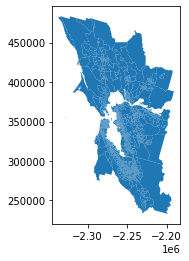

In [18]:
bay_area_tracts.plot();

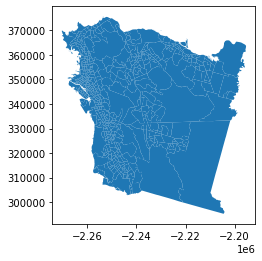

In [19]:
shapes[mask_california & mask_actransit].plot();

In [20]:
bay_area_tracts.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
# to match stop/routes crs
bay_area_tracts = bay_area_tracts.to_crs(epsg = 4326)

In [22]:
bay_area_tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
bay_area_tracts.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
3558,G0600010400100,06,001,400100,06001400100,4001,Census Tract 4001,G5020,S,6894340.0,0.0,+37.8676275,-122.2319460,14302.720874,6.894336e+06,"POLYGON ((-122.21320 37.85760, -122.21313 37.8..."
3559,G0600010400200,06,001,400200,06001400200,4002,Census Tract 4002,G5020,S,586561.0,0.0,+37.8481378,-122.2495916,3990.699597,5.865614e+05,"POLYGON ((-122.24191 37.85191, -122.24191 37.8..."
3560,G0600010400300,06,001,400300,06001400300,4003,Census Tract 4003,G5020,S,1105851.0,0.0,+37.8405970,-122.2544404,5379.766389,1.105848e+06,"POLYGON ((-122.25081 37.83714, -122.25084 37.8..."
3561,G0600010400400,06,001,400400,06001400400,4004,Census Tract 4004,G5020,S,715616.0,0.0,+37.8482808,-122.2574478,3811.588815,7.156172e+05,"POLYGON ((-122.25250 37.85083, -122.25245 37.8..."
3562,G0600010400500,06,001,400500,06001400500,4005,Census Tract 4005,G5020,S,590307.0,0.0,+37.8485412,-122.2647277,3285.980185,5.903047e+05,"POLYGON ((-122.26183 37.85258, -122.26151 37.8..."


In [24]:
bay_area_tracts.to_file(PROCESSED_DATA / 'bay_area_tracts.shp', index=False)

In [25]:
tree(PROCESSED_DATA)

+ ../data/processed
    + bay_area_2018_tracts.zip
    + bay_area_tracts.cpg
    + bay_area_tracts.dbf
    + bay_area_tracts.prj
    + bay_area_tracts.shp
    + bay_area_tracts.shx


In [26]:
file_paths = PROCESSED_DATA.glob("bay_area_tracts.*")
# writing files to a zipfile 
with ZipFile(PROCESSED_DATA / 'bay_area_2018_tracts.zip','w') as bay_area_zip: 
    # writing each file one by one 
    for file in file_paths: 
        bay_area_zip.write(file) 

In [27]:
ZipFile(PROCESSED_DATA / 'bay_area_2018_tracts.zip').filelist

[<ZipInfo filename='../data/processed/bay_area_tracts.prj' filemode='-rw-r--r--' file_size=145>,
 <ZipInfo filename='../data/processed/bay_area_tracts.dbf' filemode='-rw-r--r--' file_size=1546128>,
 <ZipInfo filename='../data/processed/bay_area_tracts.shx' filemode='-rw-r--r--' file_size=12756>,
 <ZipInfo filename='../data/processed/bay_area_tracts.cpg' filemode='-rw-r--r--' file_size=10>,
 <ZipInfo filename='../data/processed/bay_area_tracts.shp' filemode='-rw-r--r--' file_size=9073812>]